In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import combine_prediction_files, compute_network_avg_prediction

# Load splits

In [2]:
magdir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
p_test_df = pd.read_csv(os.path.join(magdir, 'feature_splits', 'p.test.csv'))
p_2023_df = pd.read_csv(os.path.join(magdir, 'feature_splits','p.20230101.csv'))
s_test_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.test.csv'))
s_2023_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.20230101.csv'))

In [3]:
np.where(p_test_df.duplicated(['Evid', 'station']))

(array([], dtype=int64),)

In [4]:
np.where(p_2023_df.duplicated(['Evid', 'station']))

(array([], dtype=int64),)

In [5]:
np.where(s_test_df.duplicated(['Evid', 'station']))

(array([], dtype=int64),)

In [6]:
np.where(s_2023_df.duplicated(['Evid', 'station']))

(array([], dtype=int64),)

In [7]:
p_test_evids = p_test_df['Evid'].unique()
p_2023_evids = p_2023_df['Evid'].unique()
s_test_evids = s_test_df['Evid'].unique()
s_2023_evids = s_2023_df['Evid'].unique()

# Load YP21 catalogs

In [ ]:
ypml_amps = pd.read_csv(f'../../data/catalogs/yellowstone.amps.ypml-v5.2024.csv')

# Load predictions and results

In [9]:
allfeatdir = "all_features"
selectedfeatdir = "selected_features"
summfilename = 'all.stat.results.csv'
p_resultsdir = os.path.join(magdir, 'p_models')
s_resultsdir = os.path.join(magdir, 's_models')

In [10]:
p_sub_results = pd.read_csv(os.path.join(p_resultsdir, selectedfeatdir, summfilename))
s_sub_results = pd.read_csv(os.path.join(s_resultsdir, selectedfeatdir, summfilename))

p_all_results = pd.read_csv(os.path.join(p_resultsdir, allfeatdir, summfilename))
s_all_results = pd.read_csv(os.path.join(s_resultsdir, allfeatdir, summfilename))

In [11]:
p_stats = p_test_df.station.unique()
p_sub_test_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'test')

p_sub_2023_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features/B207.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features/H17A.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features/B208.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features/B944.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features/B206.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features/B950.P.preds.holdout.csv does not exist, skipping...


In [12]:
p_all_test_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, allfeatdir),
                                            'P',
                                            'test')

p_all_2023_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, allfeatdir),
                                            'P',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features/B207.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features/H17A.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features/B208.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features/B944.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features/B206.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features/B950.P.preds.holdout.csv does not exist, skipping...


In [13]:
s_stats = s_test_df.station.unique()
s_sub_test_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'test')

s_sub_2023_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features/B207.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features/B206.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features/B950.S.preds.holdout.csv does not exist, skipping...


In [14]:
s_all_test_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, allfeatdir),
                                            'S',
                                            'test')

s_all_2023_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, allfeatdir),
                                            'S',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/all_features/B207.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/all_features/B206.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/all_features/B950.S.preds.holdout.csv does not exist, skipping...


In [15]:
p_all_test_avg = compute_network_avg_prediction(p_all_test_preds)
p_all_2023_avg = compute_network_avg_prediction(p_all_2023_preds)

p_sub_test_avg = compute_network_avg_prediction(p_sub_test_preds)
p_sub_2023_avg = compute_network_avg_prediction(p_sub_2023_preds)

In [16]:
s_all_test_avg = compute_network_avg_prediction(s_all_test_preds)
s_all_2023_avg = compute_network_avg_prediction(s_all_2023_preds)

s_sub_test_avg = compute_network_avg_prediction(s_sub_test_preds)
s_sub_2023_avg = compute_network_avg_prediction(s_sub_2023_preds)

In [17]:
def get_r2(df):
    return r2_score(df['magnitude'],
                    df['predicted_magnitude'])

In [18]:
p_all_test_avg_r2 = get_r2(p_all_test_avg)
p_all_2023_avg_r2 = get_r2(p_all_2023_avg)

p_sub_test_avg_r2 = get_r2(p_sub_test_avg)
p_sub_2023_avg_r2 = get_r2(p_sub_2023_avg)

In [19]:
s_all_test_avg_r2 = get_r2(s_all_test_avg)
s_all_2023_avg_r2 = get_r2(s_all_2023_avg)

s_sub_test_avg_r2 = get_r2(s_sub_test_avg)
s_sub_2023_avg_r2 = get_r2(s_sub_2023_avg)

# R2 summary plots

In [27]:
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D

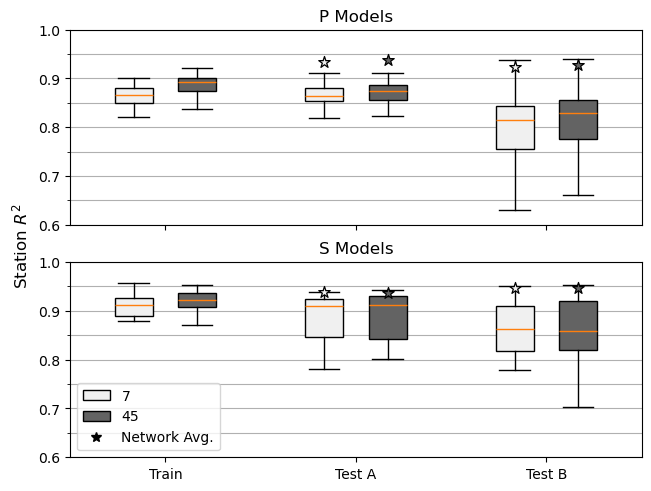

In [28]:
fig, axes = plt.subplots(2, 1, constrained_layout=True)

h_offset = 0.25
r2_marker = '*'
r2_markersize = 75
r2_marker_linewidth = 0.9
bp_colors = ['#f0f0f0', '#636363']
cap_width = 0.12
main_x = np.array([0, 0.75, 1.5])
splits = ['Train', 'Test A', 'Test B']
ylim = [0.6, 1.0]

labels = ['7', '45', 'Network Avg.']

test_r2 = [p_sub_test_avg_r2, p_all_test_avg_r2]
holdout_r2 = [p_sub_2023_avg_r2, p_all_2023_avg_r2]
ax = axes[0]
for i, df in enumerate([p_sub_results, p_all_results]):
    offset = h_offset*i
    color=bp_colors[i]
    bp1 = ax.boxplot(df[['train_r2', 'test_r2']],
                vert=True,
                positions=main_x[:-1]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    ax.scatter(main_x[1:2]+offset, test_r2[i],
               marker=r2_marker,
               color=color,
               zorder=10,
               s=r2_markersize,
               edgecolor='k',
               linewidth=r2_marker_linewidth)
    bp2 = ax.boxplot(df['holdout_r2'].dropna(),
                vert=True,
                positions=main_x[-1:]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    ax.scatter(main_x[-1:]+offset, holdout_r2[i],
               marker=r2_marker,
               color=color,
               zorder=10,
               s=r2_markersize,
               edgecolor='k',
               linewidth=r2_marker_linewidth)
    for bp in [bp1, bp2]:
        for patch in bp['boxes']:
            patch.set_facecolor(color)

ax.set_xticks(main_x+(h_offset/2), [])
ax.set_ylim(ylim)
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(axis='y', which='both')
ax.set_title("P Models")
ax.set_xlim([-0.25, 2])


ax = axes[1]
test_r2 = [s_sub_test_avg_r2, s_all_test_avg_r2]
holdout_r2 = [s_sub_2023_avg_r2, s_all_2023_avg_r2]
legend_boxes = []
for i, df in enumerate([s_sub_results, s_all_results]):
    offset = h_offset*i
    color=bp_colors[i]
    bp1 = ax.boxplot(df[['train_r2', 'test_r2']],
                vert=True,
                positions=main_x[:-1]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    ax.scatter(main_x[1:2]+offset, test_r2[i],
               marker=r2_marker,
               color=color,
               zorder=10,
               s=r2_markersize, 
               edgecolor='k',
               linewidth=r2_marker_linewidth,)
    bp2 = ax.boxplot(df['holdout_r2'].dropna(),
                vert=True,
                positions=main_x[-1:]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    star = ax.scatter(main_x[-1:]+offset, holdout_r2[i],
               marker=r2_marker,
               color=color,
               zorder=10,
               s=r2_markersize,
               edgecolor='k',
               linewidth=r2_marker_linewidth)
    for bp in [bp1, bp2]:
        for patch in bp['boxes']:
            patch.set_facecolor(color)

    legend_boxes.append(bp1['boxes'][0])

ax.set_xticks(main_x+(h_offset/2), splits)
ax.set_ylim(ylim)
ax.set_xlim([-0.25, 2])
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(axis='y', which='both')
ax.set_title("S Models")
fig.supylabel("Station $R^2$")

# Set up legend
star = Line2D([0], [0], marker=r2_marker, 
              color='black', 
              markersize=r2_markersize//10, 
              linestyle='')
legend_boxes.append(star)
ax.legend(legend_boxes, labels, loc='lower left')


In [22]:
print("P test")
print(p_sub_test_avg_r2)
print(p_all_test_avg_r2)
print('P 2023')
print(p_sub_2023_avg_r2)
print(p_all_2023_avg_r2)
print("S Test")
print(s_sub_test_avg_r2)
print(s_all_test_avg_r2)
print('S 2023')
print(s_sub_2023_avg_r2)
print(s_all_2023_avg_r2)

P test
0.9335673868784805
0.9375848919490751
P 2023
0.9226528022662508
0.9272365468488477
S Test
0.9379203661564917
0.9362380959709973
S 2023
0.9467759495720349
0.9463559709476912
